# Boston Housing — Project Tasks 1–3

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [3]:
# Task 1 summary & info
print("Shape:", boston_df.shape)
boston_df.info()
boston_df.describe().T

Shape: (506, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,506.0,252.500000,146.213884,0.00000,126.250000,252.50000,378.750000,505.0000
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000


In [4]:
# Check missing values
boston_df.isna().sum()

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
LSTAT         0
MEDV          0
dtype: int64

In [5]:
# Descriptive stats subset
vars_of_interest = ['MEDV','CHAS','AGE','NOX','INDUS','PTRATIO','DIS']
boston_df[vars_of_interest].describe()

,MEDV,CHAS,AGE,NOX,INDUS,PTRATIO,DIS
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,0.069170,68.574901,0.554695,11.136779,18.455534,3.795043
std,9.197104,0.253994,28.148861,0.115878,6.860353,2.164946,2.105710
min,5.000000,0.000000,2.900000,0.385000,0.460000,12.600000,1.129600
25%,17.025000,0.000000,45.025000,0.449000,5.190000,17.400000,2.100175
50%,21.200000,0.000000,77.500000,0.538000,9.690000,19.050000,3.207450
75%,25.000000,0.000000,94.075000,0.624000,18.100000,20.200000,5.188425
max,50.000000,1.000000,100.000000,0.871000,27.740000,22.000000,12.126500


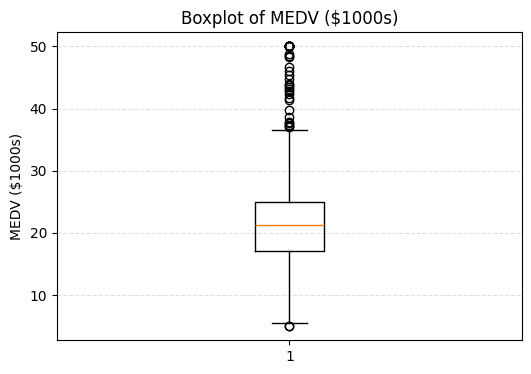

In [6]:
# Boxplot MEDV
plt.figure(figsize=(6,4))
plt.boxplot(boston_df['MEDV'].dropna(), vert=True)
plt.title('Boxplot of MEDV ($1000s)')
plt.ylabel('MEDV ($1000s)')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

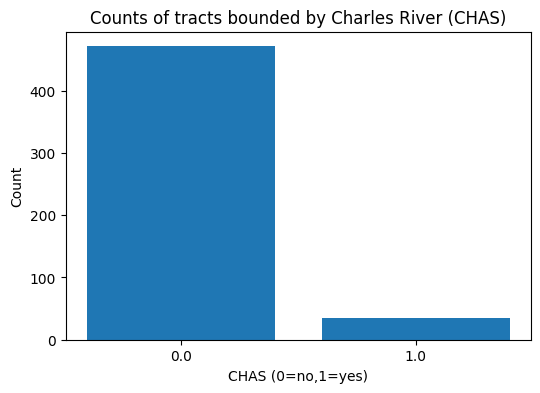

In [7]:
# Bar plot CHAS
chas_counts = boston_df['CHAS'].value_counts().sort_index()
plt.figure(figsize=(6,4))
plt.bar(chas_counts.index.astype(str), chas_counts.values)
plt.title('Counts of tracts bounded by Charles River (CHAS)')
plt.xlabel('CHAS (0=no,1=yes)')
plt.ylabel('Count')
plt.show()

/tmp/ipykernel_6709/4131687405.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=labels, showmeans=True)


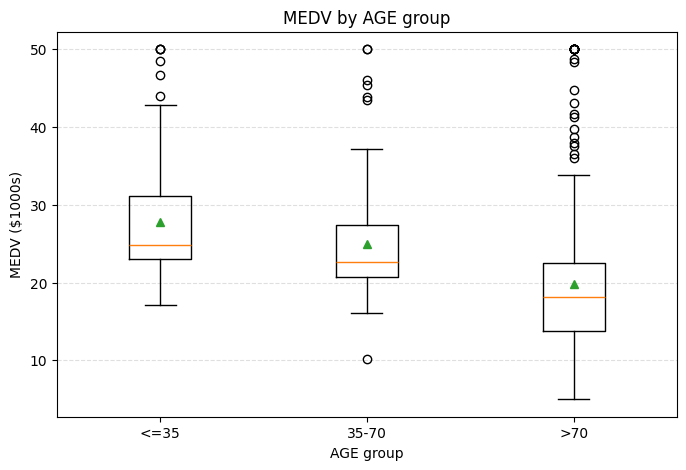

In [8]:
# Boxplot MEDV by AGE group
bins = [-1,35,70,1000]
labels = ['<=35','35-70','>70']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)
plt.figure(figsize=(8,5))
data_to_plot = [boston_df.loc[boston_df['AGE_group']==lab,'MEDV'].dropna() for lab in labels]
plt.boxplot(data_to_plot, labels=labels, showmeans=True)
plt.title('MEDV by AGE group')
plt.xlabel('AGE group')
plt.ylabel('MEDV ($1000s)')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

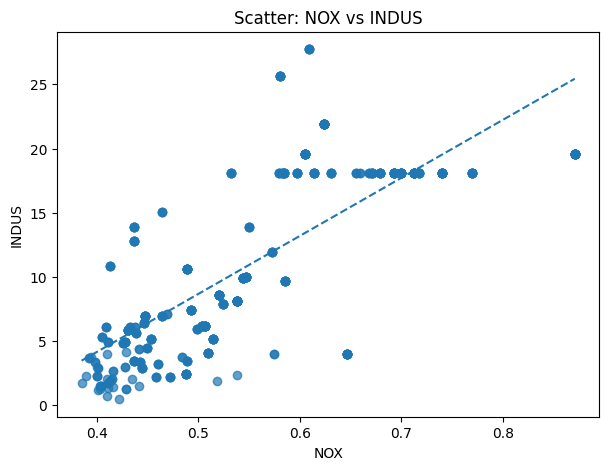

In [9]:
# Scatter NOX vs INDUS
plt.figure(figsize=(7,5))
plt.scatter(boston_df['NOX'], boston_df['INDUS'], alpha=0.7)
plt.title('Scatter: NOX vs INDUS')
plt.xlabel('NOX')
plt.ylabel('INDUS')
m,b = np.polyfit(boston_df['NOX'], boston_df['INDUS'],1)
x_line = np.linspace(boston_df['NOX'].min(), boston_df['NOX'].max(),100)
plt.plot(x_line, m*x_line+b, linestyle='--')
plt.show()

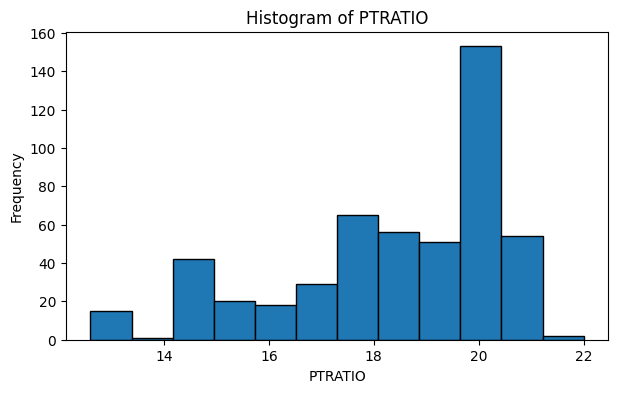

In [10]:
# Histogram PTRATIO
plt.figure(figsize=(7,4))
plt.hist(boston_df['PTRATIO'].dropna(), bins=12, edgecolor='black')
plt.title('Histogram of PTRATIO')
plt.xlabel('PTRATIO')
plt.ylabel('Frequency')
plt.show()

## 🧪 Task 3: Hypothesis Testing

### 1️⃣ T-test: Difference in Median Value of Houses Bounded by the Charles River
**Research Question:**  
Is there a significant difference in the median value of houses bounded by the Charles River or not?

- **Null Hypothesis (H₀):** There is no significant difference in the median value of houses bounded by the Charles River and those that are not.  
  \( H_0: \mu_{\text{CHAS=1}} = \mu_{\text{CHAS=0}} \)

- **Alternative Hypothesis (H₁):** There is a significant difference in the median value of houses bounded by the Charles River and those that are not.  
  \( H_1: \mu_{\text{CHAS=1}} \ne \mu_{\text{CHAS=0}} \)

---

### 2️⃣ ANOVA: Difference in Median House Values by Age Category
**Research Question:**  
Is there a difference in the median values of houses for each proportion of owner-occupied units built before 1940?

- **Null Hypothesis (H₀):** The mean median house value (MEDV) is the same across all age groups.  
  \( H_0: \mu_1 = \mu_2 = \mu_3 \)

- **Alternative Hypothesis (H₁):** At least one group’s mean median house value differs from the others.  
  \( H_1: \text{At least one } \mu_i \text{ is different} \)

---

### 3️⃣ Pearson Correlation: Relationship Between NOX and INDUS
**Research Question:**  
Can we conclude that there is no relationship between nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS)?

- **Null Hypothesis (H₀):** There is no correlation between NOX and INDUS.  
  \( H_0: r = 0 \)

- **Alternative Hypothesis (H₁):** There is a significant correlation between NOX and INDUS.  
  \( H_1: r \ne 0 \)

---

### 4️⃣ Regression: Impact of Distance to Employment Centers on Median Home Value
**Research Question:**  
What is the impact of weighted distance to the five Boston employment centers (DIS) on the median value of homes (MEDV)?

- **Null Hypothesis (H₀):** The distance to employment centers has no effect on median home value.  
  \( H_0: \beta_1 = 0 \)

- **Alternative Hypothesis (H₁):** The distance to employment centers has a significant effect on median home value.  
  \( H_1: \beta_1 \ne 0 \)


In [11]:
# T-test MEDV between CHAS groups
group0 = boston_df.loc[boston_df['CHAS']==0,'MEDV'].dropna()
group1 = boston_df.loc[boston_df['CHAS']==1,'MEDV'].dropna()
levene_stat, levene_p = stats.levene(group0, group1)
ttest_res = stats.ttest_ind(group0, group1, equal_var=(levene_p>0.05))
alpha = 0.05
print("T-test stat:", ttest_res.statistic, "p-value:", ttest_res.pvalue)
if ttest_res.pvalue<alpha:
    print("Reject H0: difference exists.")
else:
    print("Fail to reject H0.")

T-test stat: -3.113291312794837 p-value: 0.0035671700981375174
Reject H0: difference exists.


In [12]:
# ANOVA MEDV by AGE group
groups = [boston_df.loc[boston_df['AGE_group']==lab,'MEDV'].dropna() for lab in labels]
anova_stat, anova_p = stats.f_oneway(*groups)
print("ANOVA F-stat:", anova_stat, "p-value:", anova_p)
if anova_p<alpha:
    print("Reject H0: difference across AGE groups.")
else:
    print("Fail to reject H0.")

ANOVA F-stat: 36.40764999196598 p-value: 1.7105011022702984e-15
Reject H0: difference across AGE groups.


In [13]:
# Pearson correlation NOX vs INDUS
pearson_r, pearson_p = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print("Pearson r:", pearson_r, "p-value:", pearson_p)
if pearson_p<alpha:
    print("Reject H0: correlation exists.")
else:
    print("Fail to reject H0.")

Pearson r: 0.7636514469209154 p-value: 7.913361061239639e-98
Reject H0: correlation exists.


In [14]:
# Regression MEDV ~ DIS
model = smf.ols('MEDV ~ DIS', data=boston_df).fit()
print(model.summary())
coef = model.params['DIS']
print(f"For each unit increase in DIS, MEDV changes by {coef:.3f} ($1000s).")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 13 Oct 2025   Prob (F-statistic):           1.21e-08
Time:                        21:06:20   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.0